In [ ]:
#in questo caso l'end è stato considerato
!pip install biopython
import random
from Bio import SeqIO


def extract_exon_sequences(fasta_file, tsv_file, num_tsv_records=1000):
    exon_sequences = {}  # Dictionary to store exon sequences

    # Leggi tutte le righe dal file TSV
    with open(tsv_file, 'r') as tsv:
        tsv_records = tsv.readlines()

    # Rimuovi l'intestazione se presente
    header = tsv_records[0] if tsv_records else None
    if header:
        tsv_records = tsv_records[1:]

    # Estrai un numero specifico di righe (num_tsv_records) in modo casuale
    tsv_records = random.sample(tsv_records, min(num_tsv_records, len(tsv_records)))

    for record in SeqIO.parse(fasta_file, 'fasta'):
        chrom = record.id
        for line in tsv_records:
            parts = line.strip().split('\t')
            if parts[0] == chrom:
                exon_starts = list(map(int, parts[1].split(',')))
                exon_ends = list(map(int, parts[2].split(',')))

                exon_sequences.setdefault(chrom, [])
                for start, end in zip(exon_starts, exon_ends):
                    exon_sequence = get_exon_sequence(record, start, end)
                    exon_sequences[chrom].append(exon_sequence)

    return exon_sequences

def get_exon_sequence(record, start, end):
    # Extract exon sequence from the record
    exon_sequence = str(record.seq)[start:end]
    return exon_sequence

def calculate_gc_content(exon_sequences):
    all_sequences = ''.join(exon_sequences).upper()
    gc_count = sum(1 for base in all_sequences if base in ('G', 'C'))
    total_bases = len(all_sequences)
    gc_content = (gc_count / total_bases) * 100
    return gc_content

# Specify the paths to your FASTA and TSV files
fasta_file_path = '/content/drive/MyDrive/hg19.fa'
tsv_file_path = '/content/drive/MyDrive/esoni.tsv'

# Extract exon sequences (considering only 1000 random lines from the TSV file)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.1 MB/s eta 0:00:00


In [ ]:
gc_contents=[]
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 48.40%
2
Overall GC content of all exon sequences: 48.38%
3
Overall GC content of all exon sequences: 47.72%
4
Overall GC content of all exon sequences: 45.56%
5
Overall GC content of all exon sequences: 47.39%
6
Overall GC content of all exon sequences: 47.10%
7
Overall GC content of all exon sequences: 47.18%
8
Overall GC content of all exon sequences: 47.46%
9
Overall GC content of all exon sequences: 47.80%
10
Overall GC content of all exon sequences: 46.96%
11
Overall GC content of all exon sequences: 46.61%
12
Overall GC content of all exon sequences: 47.07%
13
Overall GC content of all exon sequences: 46.36%
14
Overall GC content of all exon sequences: 47.71%
15
Overall GC content of all exon sequences: 48.12%
16
Overall GC content of all exon sequences: 47.34%
17
Overall GC content of all exon sequences: 47.87%
18
Overall GC content of all exon sequences: 46.22%
19
Overall GC content of all exon sequences: 46.60%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 47.09%
2
Overall GC content of all exon sequences: 46.09%
3
Overall GC content of all exon sequences: 46.66%
4
Overall GC content of all exon sequences: 47.12%
5
Overall GC content of all exon sequences: 46.74%
6
Overall GC content of all exon sequences: 46.23%
7
Overall GC content of all exon sequences: 47.02%
8
Overall GC content of all exon sequences: 47.46%
9
Overall GC content of all exon sequences: 47.45%
10
Overall GC content of all exon sequences: 48.12%
11
Overall GC content of all exon sequences: 46.30%
12
Overall GC content of all exon sequences: 47.93%
13
Overall GC content of all exon sequences: 47.90%
14
Overall GC content of all exon sequences: 48.92%
15
Overall GC content of all exon sequences: 48.12%
16
Overall GC content of all exon sequences: 47.73%
17
Overall GC content of all exon sequences: 45.61%
18
Overall GC content of all exon sequences: 48.04%
19
Overall GC content of all exon sequences: 47.19%
20
Overall GC content

In [ ]:
with open('gc_contents.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista
gc_contents+=[47.09,46.09,46.66,47.12,46.74,46.23,47.02,47.46,47.45,48.12,46.30,47.93,47.90,48.92,48.12,47.73,45.61,48.04,47.19,46.67,46.98,
                    48.31,46.43,47.27,47.95,47.75,47.62,47.93,47.49,47.96,47.33,47.76,48.12,48.62,46.67,46.76,46.75,46.21,46.66,47.99,46.11,46.80,
                    47.14,48.08,47.58,45.55,45.99,48.12,48.34,47.09]

In [ ]:
gc_contents

['48.401696026803975',
 '48.379974660903265',
 '47.715674446339676',
 '45.55949587442733',
 '47.39379190893647',
 '47.09960246299493',
 '47.177098059375396',
 '47.45555924919378',
 '47.796645388402176',
 '46.9558819331902',
 '46.60795612699955',
 '47.07403316809219',
 '46.35851952925123',
 '47.706524957534015',
 '48.11581260727201',
 '47.33530605548737',
 '47.8736599083887',
 '46.21824060752584',
 '46.60109318828765',
 '46.0385294598148',
 '46.847274352647275',
 '47.094245501514344',
 '47.77163586111591',
 '45.483728138144784',
 '46.53082904322792',
 '47.26008465347689',
 '47.31637852116475',
 '47.32183273701377',
 '48.17746074168878',
 '50.10028826024529',
 '47.71593550406596',
 '47.19389110640865',
 '46.333921890696224',
 '46.29728133352043',
 '46.51388939250596',
 '48.45914527758508',
 '47.65157078021463',
 '47.678093396787624',
 '46.978576387207184',
 '48.31097230059266',
 '46.76468076475549',
 '49.24679597011857',
 '47.52466388517914',
 '47.28365052708643',
 '48.21453127043806',
 

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_1.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_1.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 47.84%
2
Overall GC content of all exon sequences: 47.46%
3
Overall GC content of all exon sequences: 47.59%
4
Overall GC content of all exon sequences: 47.67%
5
Overall GC content of all exon sequences: 47.63%
6
Overall GC content of all exon sequences: 45.36%
7
Overall GC content of all exon sequences: 47.62%
8
Overall GC content of all exon sequences: 47.08%
9
Overall GC content of all exon sequences: 48.11%
10
Overall GC content of all exon sequences: 46.68%
11
Overall GC content of all exon sequences: 47.21%
12
Overall GC content of all exon sequences: 46.23%
13
Overall GC content of all exon sequences: 46.78%
14
Overall GC content of all exon sequences: 48.93%
15
Overall GC content of all exon sequences: 47.93%
16
Overall GC content of all exon sequences: 46.32%
17
Overall GC content of all exon sequences: 47.34%
18
Overall GC content of all exon sequences: 46.89%
19
Overall GC content of all exon sequences: 46.80%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_2.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_2.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 46.81%
2
Overall GC content of all exon sequences: 46.20%
3
Overall GC content of all exon sequences: 48.24%
4
Overall GC content of all exon sequences: 48.03%
5
Overall GC content of all exon sequences: 46.92%
6
Overall GC content of all exon sequences: 45.34%
7
Overall GC content of all exon sequences: 47.07%
8
Overall GC content of all exon sequences: 47.74%
9
Overall GC content of all exon sequences: 47.56%
10
Overall GC content of all exon sequences: 46.15%
11
Overall GC content of all exon sequences: 46.13%
12
Overall GC content of all exon sequences: 48.00%
13
Overall GC content of all exon sequences: 48.25%
14
Overall GC content of all exon sequences: 47.22%
15
Overall GC content of all exon sequences: 46.02%
16
Overall GC content of all exon sequences: 47.18%
17
Overall GC content of all exon sequences: 46.17%
18
Overall GC content of all exon sequences: 46.68%
19
Overall GC content of all exon sequences: 46.24%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_3.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_3.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 48.29%
2
Overall GC content of all exon sequences: 46.47%
3
Overall GC content of all exon sequences: 46.69%
4
Overall GC content of all exon sequences: 48.37%
5
Overall GC content of all exon sequences: 46.36%
6
Overall GC content of all exon sequences: 46.15%
7
Overall GC content of all exon sequences: 46.98%
8
Overall GC content of all exon sequences: 47.41%
9
Overall GC content of all exon sequences: 45.79%
10
Overall GC content of all exon sequences: 46.98%
11
Overall GC content of all exon sequences: 49.14%
12
Overall GC content of all exon sequences: 45.89%
13
Overall GC content of all exon sequences: 45.57%
14
Overall GC content of all exon sequences: 48.11%
15
Overall GC content of all exon sequences: 47.55%
16
Overall GC content of all exon sequences: 47.39%
17
Overall GC content of all exon sequences: 46.66%
18
Overall GC content of all exon sequences: 47.62%
19
Overall GC content of all exon sequences: 49.22%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_4.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_4.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 48.36%
2
Overall GC content of all exon sequences: 45.77%
3
Overall GC content of all exon sequences: 46.72%
4
Overall GC content of all exon sequences: 49.02%
5
Overall GC content of all exon sequences: 47.26%
6
Overall GC content of all exon sequences: 47.10%
7
Overall GC content of all exon sequences: 46.88%
8
Overall GC content of all exon sequences: 47.45%
9
Overall GC content of all exon sequences: 46.63%
10
Overall GC content of all exon sequences: 47.26%
11
Overall GC content of all exon sequences: 46.77%
12
Overall GC content of all exon sequences: 47.38%
13
Overall GC content of all exon sequences: 46.58%
14
Overall GC content of all exon sequences: 47.09%
15
Overall GC content of all exon sequences: 47.92%
16
Overall GC content of all exon sequences: 47.55%
17
Overall GC content of all exon sequences: 46.55%
18
Overall GC content of all exon sequences: 47.83%
19
Overall GC content of all exon sequences: 47.31%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_5.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_5.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 46.09%
2
Overall GC content of all exon sequences: 47.27%
3
Overall GC content of all exon sequences: 47.74%
4
Overall GC content of all exon sequences: 46.32%
5
Overall GC content of all exon sequences: 47.16%
6
Overall GC content of all exon sequences: 46.65%
7
Overall GC content of all exon sequences: 48.39%
8
Overall GC content of all exon sequences: 47.51%
9
Overall GC content of all exon sequences: 46.03%
10
Overall GC content of all exon sequences: 48.01%
11
Overall GC content of all exon sequences: 45.88%
12
Overall GC content of all exon sequences: 47.67%
13
Overall GC content of all exon sequences: 46.42%
14
Overall GC content of all exon sequences: 48.47%
15
Overall GC content of all exon sequences: 46.80%
16
Overall GC content of all exon sequences: 47.09%
17
Overall GC content of all exon sequences: 47.15%
18
Overall GC content of all exon sequences: 46.83%
19
Overall GC content of all exon sequences: 46.93%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_6.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_6.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
#gc_contents=['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '47.77376202769303', '46.79574500650494', '47.83590817952805', '45.963597593481076', '47.09', '46.09', '46.66', '47.12', '46.74', '46.23', '47.02', '47.46', '47.45', '48.12', '46.3', '47.93', '47.9', '48.92', '48.12', '47.73', '45.61', '48.04', '47.19', '46.67', '46.98', '48.31', '46.43', '47.27', '47.95', '47.75', '47.62', '47.93', '47.49', '47.96', '47.33', '47.76', '48.12', '48.62', '46.67', '46.76', '46.75', '46.21', '46.66', '47.99', '46.11', '46.8', '47.14', '48.08', '47.58', '45.55', '45.99', '48.12', '48.34', '47.09', '47.836452770210386', '47.45684897692218', '47.59253283533927', '47.66654770750086', '47.62558260797241', '45.36423925422226', '47.620688655636755', '47.08083681333091', '48.10592462407247', '46.67514738187365', '47.205816114850506', '46.228794202862275', '46.782391628460005', '48.925489589086396', '47.92779071328116', '46.324407670423696', '47.34373464918536', '46.887637823461716', '46.79708380911749', '45.28481795613823', '47.094315550254336', '47.75729283194217', '46.620388048303184', '46.485603154880884', '46.229386696312766', '46.68983748068713', '46.92650689864885', '48.8015087223008', '47.88626112606973', '48.82502614491941', '48.24239092255769', '46.94123714043476', '46.42740179930263', '46.990341822068885', '47.70126009670428', '48.71085944916126', '47.6180480798352', '48.89288788044754', '47.59773309749847', '47.911713139755506', '45.94244148260086', '48.01354981095277', '48.59777412346967', '46.950970437543035', '46.60733168840324', '45.78858885665402', '48.64124151626022', '46.34835216257771', '47.21893454361326', '47.74862496381484', '46.81159826480691', '46.20165543390806', '48.24442719307974', '48.031060103761526', '46.918203683737076', '45.33878545530853', '47.072525109786646', '47.73800985274755', '47.55883869851714', '46.15465550276328', '46.12608464082022', '48.003935657542364', '48.2499807763673', '47.22186672773688', '46.02085130649666', '47.18069246362013', '46.16628277817151', '46.6775158534535', '46.2410214505847', '45.91916286966615', '47.174139255831626', '46.94842927183585', '46.83792070118307', '47.40301488513868', '47.13168012475242', '45.152521896707945', '48.306094263412064', '46.71840522586617', '48.134424047186144', '47.040453214387206', '47.672442972529915', '46.99534439536827', '47.31629922719041', '48.19177173191772', '46.99157696703404', '47.10474356300129', '47.16795933569958', '47.24415602278197', '46.89993939182393', '48.675890785126725', '48.134699051077384', '47.24155098693844', '47.30975314573144', '47.48087119162815', '46.00513105379258', '45.883368088013235', '46.963351351936325', '47.65804888206199', '47.29840971731018', '48.16963117069206', '48.291983898617545', '46.466866389830315', '46.68853947818635', '48.36842753355498', '46.35985776186888', '46.15432145988666', '46.9795832456325', '47.414200653209036', '45.787989177781675', '46.97652445671924', '49.14323332421654', '45.88919007288184', '45.567704813421685', '48.11429803494104', '47.54936762115117', '47.38915448881381', '46.65683368306812', '47.622358267379255', '49.218027165258185', '47.860261140884916', '46.75159621145641', '48.002403496219756', '48.42386740176184', '47.44006994875282', '47.36678015909519', '47.634875073390305', '47.23966518738014', '47.5265106560555', '46.35649661090066', '46.39258374653979', '45.95490057440704', '46.91770209033767', '47.67955905630987', '47.82307003267603', '46.92983231141661', '46.4521358927139', '45.53102349564625', '46.54346242223841', '47.69373911207306', '46.49967500765951', '48.51315228357759', '46.33537977511584', '48.4995889689923', '46.574312976995685', '47.56650506939659', '46.76657165344948', '48.05203627594171', '46.27970743673223', '47.56130233555033', '48.08953588479299', '48.36002771596466', '45.77359132213426', '46.71674465078529', '49.02224296376351', '47.26400110489607', '47.102902517683404', '46.87855205514098', '47.4532248275502', '46.63123388816396', '47.26138294466744', '46.773342596203314', '47.38287053210672', '46.583982161160556', '47.089910603458', '47.915100166496586', '47.546360907563134', '46.54990040110779', '47.83261628378927', '47.31375212754329', '45.98816540639439', '46.5522593608543', '48.61880837979366', '46.65965219241727', '46.51364650701816', '47.56240468737459', '46.31248535692409', '45.97346130869015', '46.53882033988365', '46.6848001030065', '46.139777736565044', '47.02855319718276', '46.688771583858404', '47.301401906237004', '46.45067060794625', '48.31157740206302', '45.937750432247896', '46.66117877577521', '48.2052908860737', '47.35365451733667', '46.261587281737036', '47.27852425415623', '48.43233767109433', '47.54624050301284', '46.44378217887842', '46.544875081948064', '48.04614128884853', '45.946205180672465', '46.526523238627036', '47.12914524860119', '47.05336078953896', '46.08907566600119', '47.270286801685465', '47.74339598577965', '46.322233442680535', '47.15848210364836', '46.64853555211071', '48.38797739619448', '47.506365134042234', '46.03232227517313', '48.01177711607536', '45.880426838181556', '47.67230701110321', '46.41542530783627', '48.4732877814067', '46.799957257675565', '47.08783357149978', '47.153122301737135', '46.831708527935795', '46.92708552469451', '46.93534354398893', '46.74972242564551', '47.743002369534906', '48.062684472262426', '48.07870754444506', '48.85217166133835', '48.09053628315469', '47.46806527658486', '46.399911928090475', '47.819020747814136', '46.66473360337642', '47.91704709424936', '48.28508925378988', '46.875354428944085', '47.979551311299474', '46.75470275738314', '46.92963239920543', '47.68502140624211', '47.95474139466616', '47.05928200651588', '47.46038221962369', '48.1728599686655', '48.1274544124834', '47.34794406728807', '47.87996847346196', '48.01867752197859', '46.558460782687064', '48.217488466666026', '47.60963191359207', '45.885286783042396', '46.339958532475585']

In [ ]:
#len(gc_contents)

350

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 48.00%
2
Overall GC content of all exon sequences: 45.70%
3
Overall GC content of all exon sequences: 46.59%
4
Overall GC content of all exon sequences: 45.77%
5
Overall GC content of all exon sequences: 47.52%
6
Overall GC content of all exon sequences: 46.60%
7
Overall GC content of all exon sequences: 47.53%
8
Overall GC content of all exon sequences: 47.14%
9
Overall GC content of all exon sequences: 47.49%
10
Overall GC content of all exon sequences: 47.75%
11
Overall GC content of all exon sequences: 47.96%
12
Overall GC content of all exon sequences: 46.80%
13
Overall GC content of all exon sequences: 46.14%
14
Overall GC content of all exon sequences: 47.76%
15
Overall GC content of all exon sequences: 46.91%
16
Overall GC content of all exon sequences: 48.06%
17
Overall GC content of all exon sequences: 46.36%
18
Overall GC content of all exon sequences: 47.43%
19
Overall GC content of all exon sequences: 46.59%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_7.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_7.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
len(gc_contents)

400

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 45.54%
2
Overall GC content of all exon sequences: 47.14%
3
Overall GC content of all exon sequences: 47.95%
4
Overall GC content of all exon sequences: 47.10%
5
Overall GC content of all exon sequences: 46.92%
6
Overall GC content of all exon sequences: 46.15%
7
Overall GC content of all exon sequences: 46.75%
8
Overall GC content of all exon sequences: 47.13%
9
Overall GC content of all exon sequences: 48.85%
10
Overall GC content of all exon sequences: 47.01%
11
Overall GC content of all exon sequences: 46.49%
12
Overall GC content of all exon sequences: 47.76%
13
Overall GC content of all exon sequences: 47.23%
14
Overall GC content of all exon sequences: 47.37%
15
Overall GC content of all exon sequences: 47.26%
16
Overall GC content of all exon sequences: 45.57%
17
Overall GC content of all exon sequences: 47.23%
18
Overall GC content of all exon sequences: 48.39%
19
Overall GC content of all exon sequences: 45.67%
20
Overall GC content

OSError: ignored

In [ ]:
len(gc_contents)

441

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_8.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_8.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_8.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,60):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 47.32%
2
Overall GC content of all exon sequences: 47.50%
3
Overall GC content of all exon sequences: 47.19%
4
Overall GC content of all exon sequences: 48.17%
5
Overall GC content of all exon sequences: 47.28%
6
Overall GC content of all exon sequences: 47.20%
7
Overall GC content of all exon sequences: 46.99%
8
Overall GC content of all exon sequences: 47.51%
9
Overall GC content of all exon sequences: 46.68%
10
Overall GC content of all exon sequences: 47.21%
11
Overall GC content of all exon sequences: 46.59%
12
Overall GC content of all exon sequences: 47.59%
13
Overall GC content of all exon sequences: 47.51%
14
Overall GC content of all exon sequences: 48.04%
15
Overall GC content of all exon sequences: 46.85%
16
Overall GC content of all exon sequences: 46.82%
17
Overall GC content of all exon sequences: 46.58%
18
Overall GC content of all exon sequences: 47.15%
19
Overall GC content of all exon sequences: 46.67%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_9.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_9.txt')

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_9.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 46.07%
2
Overall GC content of all exon sequences: 46.44%
3
Overall GC content of all exon sequences: 46.80%
4
Overall GC content of all exon sequences: 48.19%
5
Overall GC content of all exon sequences: 46.53%
6
Overall GC content of all exon sequences: 47.29%
7
Overall GC content of all exon sequences: 47.19%
8
Overall GC content of all exon sequences: 46.53%
9
Overall GC content of all exon sequences: 47.52%
10
Overall GC content of all exon sequences: 47.45%
11
Overall GC content of all exon sequences: 46.89%
12
Overall GC content of all exon sequences: 46.08%
13
Overall GC content of all exon sequences: 47.96%
14
Overall GC content of all exon sequences: 47.58%
15
Overall GC content of all exon sequences: 47.40%
16
Overall GC content of all exon sequences: 47.76%
17
Overall GC content of all exon sequences: 46.82%
18
Overall GC content of all exon sequences: 49.21%
19
Overall GC content of all exon sequences: 46.86%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_10.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_10.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_10.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 47.34%
2
Overall GC content of all exon sequences: 48.55%
3
Overall GC content of all exon sequences: 47.94%
4
Overall GC content of all exon sequences: 48.76%
5
Overall GC content of all exon sequences: 46.71%
6
Overall GC content of all exon sequences: 46.45%
7
Overall GC content of all exon sequences: 46.77%
8
Overall GC content of all exon sequences: 45.56%
9
Overall GC content of all exon sequences: 46.92%
10
Overall GC content of all exon sequences: 47.66%
11
Overall GC content of all exon sequences: 47.98%
12
Overall GC content of all exon sequences: 47.37%
13
Overall GC content of all exon sequences: 47.19%
14
Overall GC content of all exon sequences: 46.99%
15
Overall GC content of all exon sequences: 48.87%
16
Overall GC content of all exon sequences: 46.25%
17
Overall GC content of all exon sequences: 46.17%
18
Overall GC content of all exon sequences: 47.64%
19
Overall GC content of all exon sequences: 46.88%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_11.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_11.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_11.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
len(gc_contents)

600

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 47.72%
2
Overall GC content of all exon sequences: 47.79%
3
Overall GC content of all exon sequences: 47.99%
4
Overall GC content of all exon sequences: 45.78%
5
Overall GC content of all exon sequences: 46.88%
6
Overall GC content of all exon sequences: 47.47%
7
Overall GC content of all exon sequences: 48.85%
8
Overall GC content of all exon sequences: 46.48%
9
Overall GC content of all exon sequences: 46.67%
10
Overall GC content of all exon sequences: 47.65%
11
Overall GC content of all exon sequences: 47.29%
12
Overall GC content of all exon sequences: 46.02%
13
Overall GC content of all exon sequences: 46.69%
14
Overall GC content of all exon sequences: 45.87%
15
Overall GC content of all exon sequences: 47.06%
16
Overall GC content of all exon sequences: 46.15%
17
Overall GC content of all exon sequences: 46.82%
18
Overall GC content of all exon sequences: 47.50%
19
Overall GC content of all exon sequences: 47.50%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_12.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_12.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_12.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 45.78%
2
Overall GC content of all exon sequences: 47.56%
3
Overall GC content of all exon sequences: 46.89%
4
Overall GC content of all exon sequences: 48.20%
5
Overall GC content of all exon sequences: 47.28%
6
Overall GC content of all exon sequences: 46.20%
7
Overall GC content of all exon sequences: 47.74%
8
Overall GC content of all exon sequences: 48.49%
9
Overall GC content of all exon sequences: 45.87%
10
Overall GC content of all exon sequences: 47.03%
11
Overall GC content of all exon sequences: 46.00%
12
Overall GC content of all exon sequences: 46.80%
13
Overall GC content of all exon sequences: 47.38%
14
Overall GC content of all exon sequences: 47.96%
15
Overall GC content of all exon sequences: 46.18%
16
Overall GC content of all exon sequences: 47.86%
17
Overall GC content of all exon sequences: 45.50%
18
Overall GC content of all exon sequences: 46.79%
19
Overall GC content of all exon sequences: 47.46%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_13.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_13.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_13.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 47.20%
2
Overall GC content of all exon sequences: 46.59%
3
Overall GC content of all exon sequences: 45.39%
4
Overall GC content of all exon sequences: 48.34%
5
Overall GC content of all exon sequences: 47.40%
6
Overall GC content of all exon sequences: 47.61%
7
Overall GC content of all exon sequences: 47.15%
8
Overall GC content of all exon sequences: 48.23%
9
Overall GC content of all exon sequences: 47.26%
10
Overall GC content of all exon sequences: 46.51%
11
Overall GC content of all exon sequences: 48.15%
12
Overall GC content of all exon sequences: 46.68%
13
Overall GC content of all exon sequences: 46.98%
14
Overall GC content of all exon sequences: 47.65%
15
Overall GC content of all exon sequences: 47.70%
16
Overall GC content of all exon sequences: 48.27%
17
Overall GC content of all exon sequences: 46.49%
18
Overall GC content of all exon sequences: 47.38%
19
Overall GC content of all exon sequences: 47.68%
20
Overall GC content

OSError: ignored

In [ ]:
len(gc_contents)

732

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_14.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_14.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_14.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,69):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 46.50%
2
Overall GC content of all exon sequences: 46.55%
3
Overall GC content of all exon sequences: 48.32%
4
Overall GC content of all exon sequences: 47.42%
5
Overall GC content of all exon sequences: 47.99%
6
Overall GC content of all exon sequences: 46.91%
7
Overall GC content of all exon sequences: 46.86%
8
Overall GC content of all exon sequences: 47.53%
9
Overall GC content of all exon sequences: 46.36%
10
Overall GC content of all exon sequences: 46.28%
11
Overall GC content of all exon sequences: 47.25%
12
Overall GC content of all exon sequences: 47.75%
13
Overall GC content of all exon sequences: 46.46%
14
Overall GC content of all exon sequences: 46.26%
15
Overall GC content of all exon sequences: 47.69%
16
Overall GC content of all exon sequences: 45.48%
17
Overall GC content of all exon sequences: 47.39%
18
Overall GC content of all exon sequences: 47.59%
19
Overall GC content of all exon sequences: 46.78%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_15.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_15.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_15.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 46.19%
2
Overall GC content of all exon sequences: 47.09%
3
Overall GC content of all exon sequences: 48.18%
4
Overall GC content of all exon sequences: 47.62%
5
Overall GC content of all exon sequences: 46.58%
6
Overall GC content of all exon sequences: 47.86%
7
Overall GC content of all exon sequences: 47.17%
8
Overall GC content of all exon sequences: 45.97%
9
Overall GC content of all exon sequences: 46.83%
10
Overall GC content of all exon sequences: 47.37%
11
Overall GC content of all exon sequences: 47.75%
12
Overall GC content of all exon sequences: 45.55%
13
Overall GC content of all exon sequences: 45.38%
14
Overall GC content of all exon sequences: 46.00%
15
Overall GC content of all exon sequences: 47.37%
16
Overall GC content of all exon sequences: 47.28%
17
Overall GC content of all exon sequences: 47.43%
18
Overall GC content of all exon sequences: 48.23%
19
Overall GC content of all exon sequences: 47.59%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_16.txt'
# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_16.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_16.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 47.77%
2
Overall GC content of all exon sequences: 48.35%
3
Overall GC content of all exon sequences: 47.43%
4
Overall GC content of all exon sequences: 46.65%
5
Overall GC content of all exon sequences: 48.06%
6
Overall GC content of all exon sequences: 46.45%
7
Overall GC content of all exon sequences: 47.91%
8
Overall GC content of all exon sequences: 47.60%
9
Overall GC content of all exon sequences: 47.59%
10
Overall GC content of all exon sequences: 48.53%
11
Overall GC content of all exon sequences: 48.18%
12
Overall GC content of all exon sequences: 46.08%
13
Overall GC content of all exon sequences: 48.16%
14
Overall GC content of all exon sequences: 46.24%
15
Overall GC content of all exon sequences: 45.28%
16
Overall GC content of all exon sequences: 46.56%
17
Overall GC content of all exon sequences: 45.94%
18
Overall GC content of all exon sequences: 46.93%
19
Overall GC content of all exon sequences: 46.01%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_17.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_17.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_17.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 48.10%
2
Overall GC content of all exon sequences: 46.85%
3
Overall GC content of all exon sequences: 47.59%
4
Overall GC content of all exon sequences: 47.79%
5
Overall GC content of all exon sequences: 47.34%
6
Overall GC content of all exon sequences: 47.16%
7
Overall GC content of all exon sequences: 46.51%
8
Overall GC content of all exon sequences: 47.24%
9
Overall GC content of all exon sequences: 47.23%
10
Overall GC content of all exon sequences: 48.00%
11
Overall GC content of all exon sequences: 47.43%
12
Overall GC content of all exon sequences: 46.09%
13
Overall GC content of all exon sequences: 46.56%
14
Overall GC content of all exon sequences: 46.78%
15
Overall GC content of all exon sequences: 47.31%
16
Overall GC content of all exon sequences: 46.91%
17
Overall GC content of all exon sequences: 47.31%
18
Overall GC content of all exon sequences: 45.75%
19
Overall GC content of all exon sequences: 46.20%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_18.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_18.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_18.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 46.57%
2
Overall GC content of all exon sequences: 46.07%
3
Overall GC content of all exon sequences: 47.75%
4
Overall GC content of all exon sequences: 47.60%
5
Overall GC content of all exon sequences: 46.38%
6
Overall GC content of all exon sequences: 47.52%
7
Overall GC content of all exon sequences: 45.21%
8
Overall GC content of all exon sequences: 46.63%
9
Overall GC content of all exon sequences: 46.49%
10
Overall GC content of all exon sequences: 47.41%
11
Overall GC content of all exon sequences: 46.47%
12
Overall GC content of all exon sequences: 45.99%
13
Overall GC content of all exon sequences: 47.30%
14
Overall GC content of all exon sequences: 47.44%
15
Overall GC content of all exon sequences: 46.57%
16
Overall GC content of all exon sequences: 47.84%
17
Overall GC content of all exon sequences: 48.25%
18
Overall GC content of all exon sequences: 47.23%
19
Overall GC content of all exon sequences: 48.76%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_19.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_19.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Leggi il contenuto del file e crea la lista
gc_contents = []

with open('gc_contents_19.txt', 'r') as file:
    for line in file:
        gc_contents.append(line.strip())  # Aggiungi ogni riga come elemento della lista

print('Lista creata dal file:', gc_contents)

Lista creata dal file: ['48.401696026803975', '48.379974660903265', '47.715674446339676', '45.55949587442733', '47.39379190893647', '47.09960246299493', '47.177098059375396', '47.45555924919378', '47.796645388402176', '46.9558819331902', '46.60795612699955', '47.07403316809219', '46.35851952925123', '47.706524957534015', '48.11581260727201', '47.33530605548737', '47.8736599083887', '46.21824060752584', '46.60109318828765', '46.0385294598148', '46.847274352647275', '47.094245501514344', '47.77163586111591', '45.483728138144784', '46.53082904322792', '47.26008465347689', '47.31637852116475', '47.32183273701377', '48.17746074168878', '50.10028826024529', '47.71593550406596', '47.19389110640865', '46.333921890696224', '46.29728133352043', '46.51388939250596', '48.45914527758508', '47.65157078021463', '47.678093396787624', '46.978576387207184', '48.31097230059266', '46.76468076475549', '49.24679597011857', '47.52466388517914', '47.28365052708643', '48.21453127043806', '46.21715412244457', '

In [ ]:
for i in range(1,51):
    exon_sequences = extract_exon_sequences(fasta_file_path, tsv_file_path, num_tsv_records=1000)
    # Calculate the GC content for all exon sequences and print the GC content
    gc_content = calculate_gc_content([sequence for sequences in exon_sequences.values() for sequence in sequences])
    print(i)
    print(f'Overall GC content of all exon sequences: {gc_content:.2f}%')
    gc_contents.append(gc_content)

1
Overall GC content of all exon sequences: 48.13%
2
Overall GC content of all exon sequences: 47.55%
3
Overall GC content of all exon sequences: 46.85%
4
Overall GC content of all exon sequences: 46.90%
5
Overall GC content of all exon sequences: 47.62%
6
Overall GC content of all exon sequences: 46.88%
7
Overall GC content of all exon sequences: 47.00%
8
Overall GC content of all exon sequences: 47.52%
9
Overall GC content of all exon sequences: 48.08%
10
Overall GC content of all exon sequences: 46.79%
11
Overall GC content of all exon sequences: 47.02%
12
Overall GC content of all exon sequences: 47.67%
13
Overall GC content of all exon sequences: 48.13%
14
Overall GC content of all exon sequences: 47.41%
15
Overall GC content of all exon sequences: 48.20%
16
Overall GC content of all exon sequences: 47.94%
17
Overall GC content of all exon sequences: 47.15%
18
Overall GC content of all exon sequences: 47.28%
19
Overall GC content of all exon sequences: 46.82%
20
Overall GC content

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_20.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_20.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
gc_contents[50:100]=[]

In [ ]:
len(gc_contents)

1000

In [ ]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_finale.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

from google.colab import files
files.download('gc_contents_finale.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
gc_contents=[float(char) for char in gc_contents]


In [ ]:
gc_contents

[48.401696026803975,
 48.379974660903265,
 47.715674446339676,
 45.55949587442733,
 47.39379190893647,
 47.09960246299493,
 47.177098059375396,
 47.45555924919378,
 47.796645388402176,
 46.9558819331902,
 46.60795612699955,
 47.07403316809219,
 46.35851952925123,
 47.706524957534015,
 48.11581260727201,
 47.33530605548737,
 47.8736599083887,
 46.21824060752584,
 46.60109318828765,
 46.0385294598148,
 46.847274352647275,
 47.094245501514344,
 47.77163586111591,
 45.483728138144784,
 46.53082904322792,
 47.26008465347689,
 47.31637852116475,
 47.32183273701377,
 48.17746074168878,
 50.10028826024529,
 47.71593550406596,
 47.19389110640865,
 46.333921890696224,
 46.29728133352043,
 46.51388939250596,
 48.45914527758508,
 47.65157078021463,
 47.678093396787624,
 46.978576387207184,
 48.31097230059266,
 46.76468076475549,
 49.24679597011857,
 47.52466388517914,
 47.28365052708643,
 48.21453127043806,
 46.21715412244457,
 47.77376202769303,
 46.79574500650494,
 47.83590817952805,
 45.9635975

<ipython-input-28-f1b5ba594800>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gc_contents, shade=True)


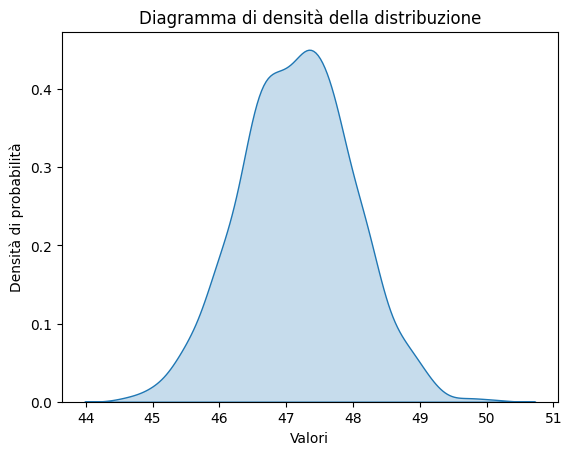

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(gc_contents, shade=True)
plt.xlabel('Valori')
plt.ylabel('Densità di probabilità')
plt.title('Diagramma di densità della distribuzione')
plt.show()

In [ ]:
import numpy as np
np.mean(gc_contents)

47.15886145219592

In [ ]:
np.var(gc_contents)

0.6930204908746788